In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sys
sys.path.append("../..")
from utils import utils, model_utils

## Results

In [23]:
results = pd.read_excel("batch_size_experiment_results.xlsx")
results["log2_batch_size"] = np.log2(results["batch_size"])

In [49]:
sns.set(font_scale=2)
sns.set_style({"axes.linewidth": 1, "axes.edgecolor": "black",
                       "xtick.bottom": True, "ytick.left": True})

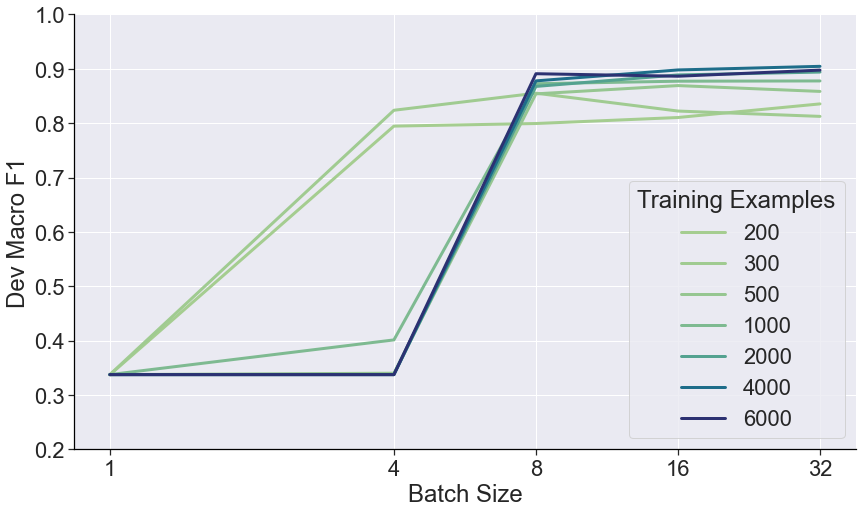

In [79]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=results, x="log2_batch_size", y="best_dev_score", hue="train_size", ax=ax, palette="crest", linewidth=3)
ax.set_ylim((0.2, 1))
ax.set_xticks(results["log2_batch_size"].unique())
ax.set_xticklabels(results["batch_size"].unique())
ax.set_xlabel("Batch Size")
ax.set_ylabel("Dev Macro F1")
ax.legend(sorted(results["train_size"].unique()), title="Training Examples")
sns.despine()
plt.savefig("batch_size_experiment_results.pdf", dpi=400, bbox_inches="tight")
plt.show()

## Max length analysis

In [55]:
tokenizer = model_utils.get_tokenizer("xlm-roberta", "sentiment")

In [76]:
def get_train_examples_under(info, d, length, tokenizer):
    file_path, lang_name, lang_code, dataset = [info[k] for k in ["file_path", "lang_name", "lang_code", "dataset"]]
    if dataset == "train":
        data = pd.read_csv(file_path, header=None)
        data.columns = ["sentiment", "review"]
        d[lang_name] = (data.shape[0], np.sum(data["review"].apply(lambda x: len(tokenizer.encode(x))) <= length))
    return d

In [77]:
usable_examples = utils.run_through_data("../../data/sentiment/", get_train_examples_under, {}, length=256, tokenizer=tokenizer)

../../data/sentiment\ko\kosac-corpus-130808.csv is not a valid data path, skipping



In [85]:
acl_langs = utils.get_langs("acl")
print("{:<15}{:<15}{:<15}".format("Language", "All train", "Under 256 tkns"))
print("{:-^45}".format(""))
for k, v in usable_examples.items():
    if k in acl_langs:
        print("{:<15}{:<15}{:<15}".format(k, v[0], v[1]))

Language       All train      Under 256 tkns 
---------------------------------------------
Arabic         35841          32492          
Algerian       564            564            
German         4939           4937           
Greek          462            462            
Spanish        1029           1029           
Basque         789            789            
Finnish        1355           1297           
Hebrew         8702           8581           
Indonesian     100307         100254         
Japanese       13976          12511          
Korean         3237           3237           
Maltese        502            502            
Norwegian      2675           2675           
Slovak         3724           3708           
Thai           8103           8090           
Turkish        915            915            
Vietnamese     2384           2378           
Chinese        19292          18268          
Cantonese      31217          31217          
